In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df=pd.read_csv('winequality-white.csv',sep=';')

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# What to predict?

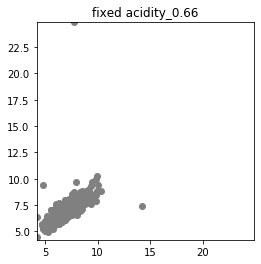

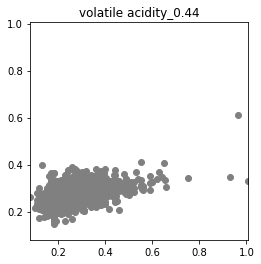

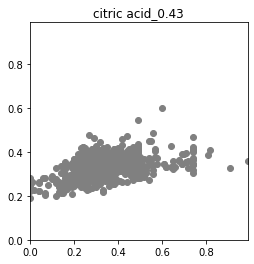

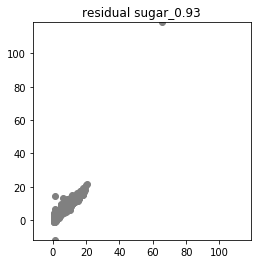

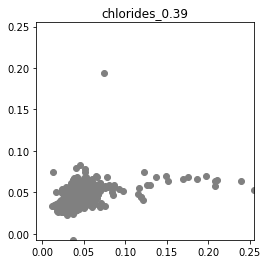

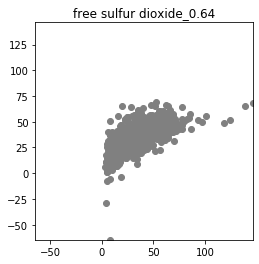

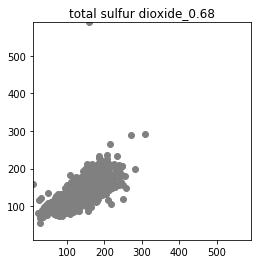

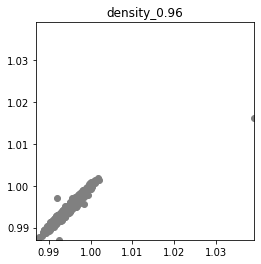

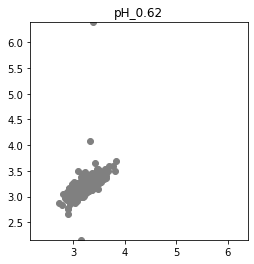

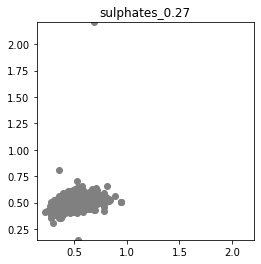

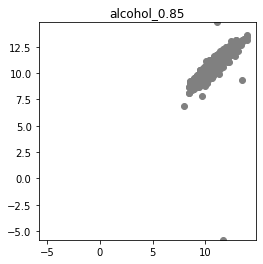

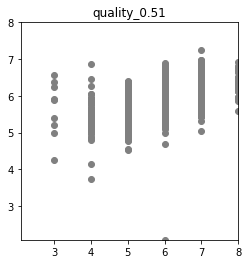

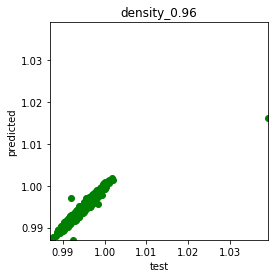

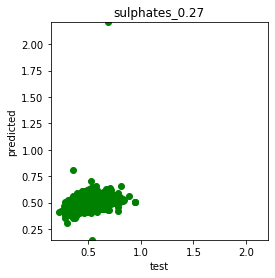

In [5]:
max_corr=['name',0]
min_corr=['name',1]

for output in df.columns:
    X=df.drop(columns=output)
    y=df[output]
    
    #normalize
    X=(X-X.mean())/X.std()


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


    regressor = LinearRegression()  
    regressor.fit(X_train, y_train) #training the algorithm


    y_pred = regressor.predict(X_test)

    min_=min([min(y_test),min(y_pred)])
    max_=max([max(y_test),max(y_pred)])
    plt.scatter(y_test,y_pred,  color='gray')
    plt.xlim(min_, max_)
    plt.ylim(min_, max_)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(output+'_'+str(np.round(np.corrcoef(y_test,y_pred)[0][1],decimals=2)))
    # plt.plot(y_pred, color='red', linewidth=2)
    plt.show()
    if np.abs(np.round(np.corrcoef(y_test,y_pred)[0][1],decimals=2))>max_corr[1]:
        max_corr[1]=np.abs(np.round(np.corrcoef(y_test,y_pred)[0][1],decimals=2))
        max_corr[0]=output
        y_pred_max=y_pred
        y_test_max=y_test
    if np.abs(np.round(np.corrcoef(y_test,y_pred)[0][1],decimals=2))<min_corr[1]:
        min_corr[1]=np.abs(np.round(np.corrcoef(y_test,y_pred)[0][1],decimals=2))
        min_corr[0]=output
        y_pred_min=y_pred
        y_test_min=y_test

min_=min([min(y_test_max),min(y_pred_max)])
max_=max([max(y_test_max),max(y_pred_max)])
plt.scatter(y_test_max,y_pred_max,  color='green')
plt.xlim(min_, max_)
plt.ylim(min_, max_)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(max_corr[0]+'_'+str(max_corr[1]))
plt.xlabel('test')
plt.ylabel('predicted')
# plt.plot(y_pred, color='red', linewidth=2)
plt.show()

min_=min([min(y_test_min),min(y_pred_min)])
max_=max([max(y_test_min),max(y_pred_min)])
plt.scatter(y_test_min,y_pred_min,  color='green')
plt.xlim(min_, max_)
plt.ylim(min_, max_)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(min_corr[0]+'_'+str(min_corr[1]))
plt.xlabel('test')
plt.ylabel('predicted')
# plt.plot(y_pred, color='red', linewidth=2)
plt.show()

In [6]:
print('max',max_corr[0],'\n','min:',min_corr[0])
maximim=True

max density 
 min: sulphates


### remove outliers <0.5 >0.95 percentile:

In [7]:
if maximim==True:
    predict=max_corr[0]
else:
    predict=min_corr[0]
remove_outliers=True

In [8]:
if remove_outliers==True:
    features=[cols for cols in df.columns if cols != predict]
    for feat in features:
        y = df[feat]
        removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
        print(feat,'\n',removed_outliers.value_counts())

    print(50*'_')
    for feat in features:
        y = df[feat]
        removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
        print(feat,'\n',removed_outliers.value_counts())
        index_names = df[~removed_outliers].index
        df.drop(index_names, inplace=True)
    remove_outliers=False

fixed acidity 
 True     4477
False     421
Name: fixed acidity, dtype: int64
volatile acidity 
 True     4498
False     400
Name: volatile acidity, dtype: int64
citric acid 
 True     4448
False     450
Name: citric acid, dtype: int64
residual sugar 
 True     4487
False     411
Name: residual sugar, dtype: int64
chlorides 
 True     4429
False     469
Name: chlorides, dtype: int64
free sulfur dioxide 
 True     4438
False     460
Name: free sulfur dioxide, dtype: int64
total sulfur dioxide 
 True     4424
False     474
Name: total sulfur dioxide, dtype: int64
pH 
 True     4444
False     454
Name: pH, dtype: int64
sulphates 
 True     4438
False     460
Name: sulphates, dtype: int64
alcohol 
 True     4440
False     458
Name: alcohol, dtype: int64
quality 
 True     4535
False     363
Name: quality, dtype: int64
__________________________________________________
fixed acidity 
 True     4477
False     421
Name: fixed acidity, dtype: int64
volatile acidity 
 True     4101
False     37

## get correlation matrix

In [9]:
corrMatrix = df.corr()
#print (corrMatrix)

In [10]:
for key in corrMatrix.keys():
    print(key,':',corrMatrix.keys()[corrMatrix[key].tolist().index(max([i for i in corrMatrix[key] if i !=1]))],max([i for i in corrMatrix[key] if i !=1]))
    if key == predict:
        best_feat=corrMatrix.keys()[corrMatrix[key].tolist().index(max([i for i in corrMatrix[key] if i !=1]))]

fixed acidity : citric acid 0.2295954303331717
volatile acidity : total sulfur dioxide 0.15635479588912501
citric acid : fixed acidity 0.2295954303331717
residual sugar : density 0.8332231632138393
chlorides : density 0.45286932345948216
free sulfur dioxide : total sulfur dioxide 0.5492959194163811
total sulfur dioxide : free sulfur dioxide 0.5492959194163811
density : residual sugar 0.8332231632138393
pH : quality 0.10679837476258698
sulphates : pH 0.08096863181754148
alcohol : quality 0.442504649832045
quality : alcohol 0.442504649832045


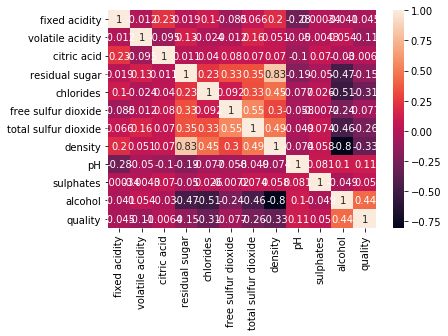

In [11]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
X=df.drop(columns=predict)
y=df[predict]

X=(X-X.mean())/X.std()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0003334605457663407
Mean Squared Error: 1.7740442620967274e-07
Root Mean Squared Error: 0.0004211940481650622


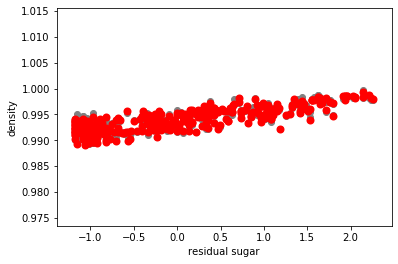

In [13]:
plt.scatter(X_test[best_feat], y_test,  color='gray')
plt.scatter(X_test[best_feat], y_pred, color='red', linewidth=2)
plt.xlabel(best_feat)
plt.ylabel(predict)
plt.show()

In [14]:
(y_test-y_pred).abs().sum()
(y_test-y_pred).abs().std(),y_test.max()-y_test.min()

(0.0002576692270040005, 0.010620000000000074)